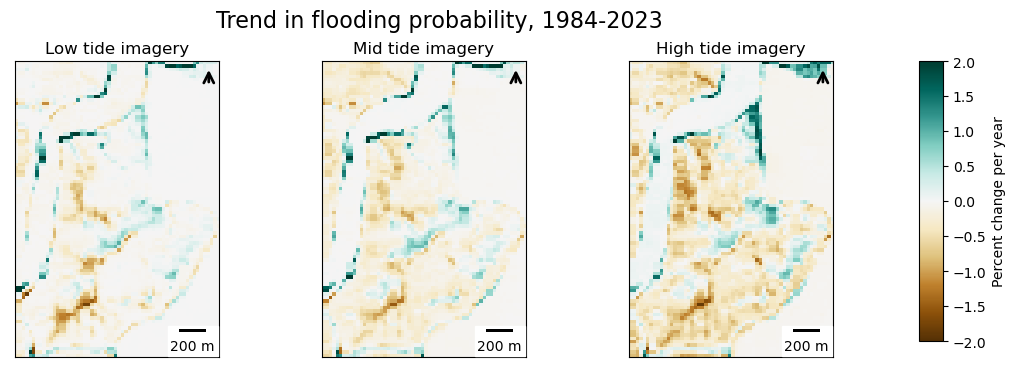

In [1]:
#GEORGIA

import matplotlib.pyplot as plt
import numpy as np
import rasterio
import geopandas as gpd
from geopy.distance import great_circle
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.colors as colors

h_x = "F:/Flats imagery/Tide stage composites/high_slope.scale.tif"
m_x = "F:/Flats imagery/Tide stage composites/mid_slope.scale.tif"
l_x = "F:/Flats imagery/Tide stage composites/low_slope.scale.tif"

slope_paths = [l_x, m_x, h_x]

def plot_geotiff_with_scale_and_north_arrow(geotiff_path, ax, title, data_min, data_max):
    with rasterio.open(geotiff_path) as src:
        data = src.read(1)
        extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
        
        gamma = 1
        data = data ** gamma 

        # Normalize the data based on the overall min and max values
        data_normalized = (data) / (1)*100
        
        cmap = 'BrBG'
        im = ax.imshow(data_normalized, extent=extent, cmap=cmap, vmin=-2, vmax=2)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        scale_bar = ScaleBar(dx=dx, location='lower right')
        ax.add_artist(scale_bar)
        
        ax.annotate('', xy=(0.95, 0.98), xycoords='axes fraction', fontsize=18, ha='center', va='center',
                    xytext=(0.95, 0.92), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle='->', lw=2, color='black'))
        
        ax.set_title(title)
        
        return im

# Calculate dx for scale_bar
point1 = (31.425, -81.29)
point2 = (31.425, -80.29)
dx = great_circle(point1, point2).meters

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Adjusted figsize

ims = []
titles = ['Low tide imagery', 'Mid tide imagery', 'High tide imagery']
data_min = float('inf')
data_max = float('-inf')

for i, ax in enumerate(axs.flat):
    with rasterio.open(slope_paths[i]) as src:
        data = src.read(1)
        data_min = min(data_min, np.min(data))
        data_max = max(data_max, np.max(data))

for i, ax in enumerate(axs.flat):
    im = plot_geotiff_with_scale_and_north_arrow(slope_paths[i], ax, titles[i], data_min, data_max)
    ims.append(im)

plt.suptitle('Trend in flooding probability, 1984-2023', fontsize=16)

fig.subplots_adjust(right=0.85)
plt.subplots_adjust(top=0.85)

# cbar.set_ticks([-0.02, -0.01, 0, 0.01, 0.02])
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
cbar = plt.colorbar(ims[-1], cax=cbar_ax, label='Percent change per year')

# Savefig
import os
os.chdir("C:/Users/arj26323/Downloads")
# plt.savefig('percentslopes_trend.png',bbox_inches='tight', dpi = 300)

plt.show()

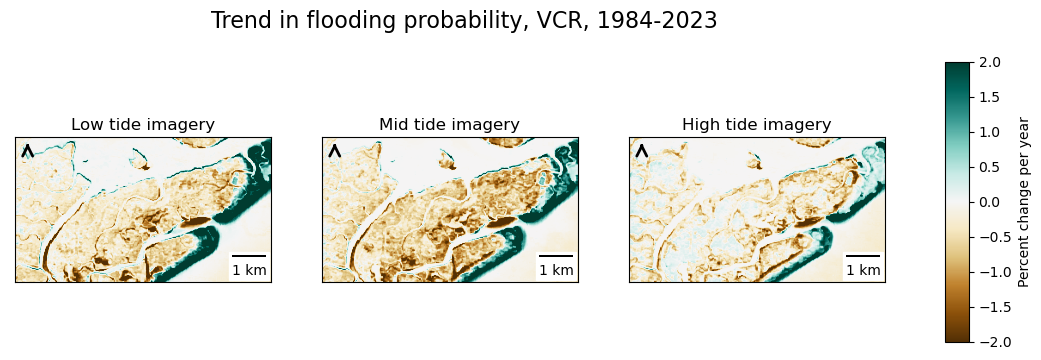

In [2]:
##VIRGINIA

import matplotlib.pyplot as plt
import numpy as np
import rasterio
import geopandas as gpd
from geopy.distance import great_circle
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.colors as colors

h_x = "F:/Flats imagery/Tidecomps_VA/high_slope.scale.tif"
m_x = "F:/Flats imagery/Tidecomps_VA/mid_slope.scale.tif"
l_x = "F:/Flats imagery/Tidecomps_VA/low_slope.scale.tif"

slope_paths = [l_x, m_x, h_x]

def plot_geotiff_with_scale_and_north_arrow(geotiff_path, ax, title, data_min, data_max):
    with rasterio.open(geotiff_path) as src:
        data = src.read(1)
        extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
        
        gamma = 1
        data = data ** gamma 

        # Normalize the data based on the overall min and max values
        data_normalized = (data) / (1)*100
        
        cmap = 'BrBG'
        im = ax.imshow(data_normalized, extent=extent, cmap=cmap, vmin=-2, vmax=2)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        scale_bar = ScaleBar(dx=dx, location='lower right')
        ax.add_artist(scale_bar)
        
        ax.annotate('', xy=(0.05, 0.98), xycoords='axes fraction', fontsize=18, ha='center', va='center',
                    xytext=(0.05, 0.92), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle='->', lw=2, color='black'))
        
        ax.set_title(title)
        
        return im

# Calculate dx for scale_bar
point1 = (31.425, -81.29)
point2 = (31.425, -80.29)
dx = great_circle(point1, point2).meters

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Adjusted figsize

ims = []
titles = ['Low tide imagery', 'Mid tide imagery', 'High tide imagery']
data_min = float('inf')
data_max = float('-inf')

for i, ax in enumerate(axs.flat):
    with rasterio.open(slope_paths[i]) as src:
        data = src.read(1)
        data_min = min(data_min, np.min(data))
        data_max = max(data_max, np.max(data))

for i, ax in enumerate(axs.flat):
    im = plot_geotiff_with_scale_and_north_arrow(slope_paths[i], ax, titles[i], data_min, data_max)
    ims.append(im)

plt.suptitle('Trend in flooding probability, VCR, 1984-2023', fontsize=16)

fig.subplots_adjust(right=0.85)
plt.subplots_adjust(top=0.85)

# cbar.set_ticks([-0.02, -0.01, 0, 0.01, 0.02])
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
cbar = plt.colorbar(ims[-1], cax=cbar_ax, label='Percent change per year')

# Savefig
import os
os.chdir("C:/Users/arj26323/Downloads")
# plt.savefig('vcr_trend.png',bbox_inches='tight', dpi = 300)

plt.show()

#Check out: https://earthengine.google.com/timelapse/

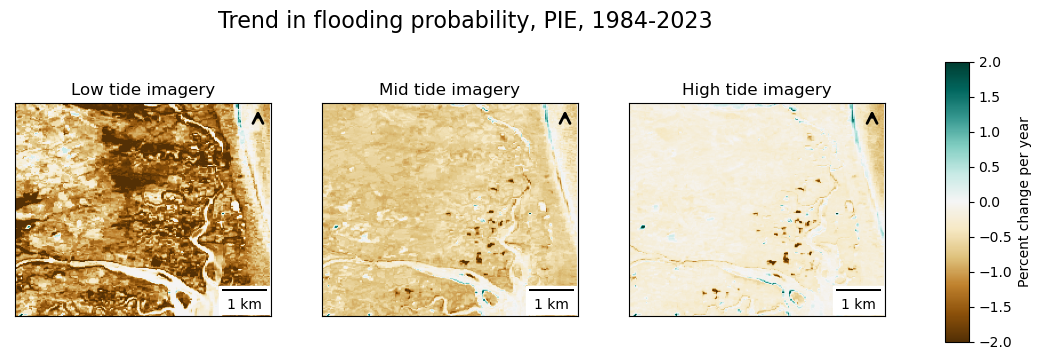

In [3]:
#MASSACHUSETTS

h_x = "F:/Flats imagery/Tidecomps_MA/high_slope.scale.tif"
m_x = "F:/Flats imagery/Tidecomps_MA/mid_slope.scale.tif"
l_x = "F:/Flats imagery/Tidecomps_MA/low_slope.scale.tif"

slope_paths = [l_x, m_x, h_x]

def plot_geotiff_with_scale_and_north_arrow(geotiff_path, ax, title, data_min, data_max):
    with rasterio.open(geotiff_path) as src:
        data = src.read(1)
        extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
        
        gamma = 1
        data = data ** gamma 

#         Normalize the data based on the overall min and max values
        data_normalized = (data) / (1)*100
        
        cmap = 'BrBG'
        im = ax.imshow(data_normalized, extent=extent, cmap=cmap, vmin=-2, vmax=2)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        scale_bar = ScaleBar(dx=dx, location='lower right')
        ax.add_artist(scale_bar)
        
        ax.annotate('', xy=(0.95, 0.98), xycoords='axes fraction', fontsize=18, ha='center', va='center',
                    xytext=(0.95, 0.92), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle='->', lw=2, color='black'))
        
        ax.set_title(title)
        
        return im

# Calculate dx for scale_bar
point1 = (31.425, -81.29)
point2 = (31.425, -80.29)
dx = great_circle(point1, point2).meters

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Adjusted figsize

ims = []
titles = ['Low tide imagery', 'Mid tide imagery', 'High tide imagery']
data_min = float('inf')
data_max = float('-inf')

for i, ax in enumerate(axs.flat):
    with rasterio.open(slope_paths[i]) as src:
        data = src.read(1)
        data_min = min(data_min, np.min(data))
        data_max = max(data_max, np.max(data))

for i, ax in enumerate(axs.flat):
    im = plot_geotiff_with_scale_and_north_arrow(slope_paths[i], ax, titles[i], data_min, data_max)
    ims.append(im)

plt.suptitle('Trend in flooding probability, PIE, 1984-2023', fontsize=16)

fig.subplots_adjust(right=0.85)
plt.subplots_adjust(top=0.85)

# cbar.set_ticks([-0.02, -0.01, 0, 0.01, 0.02])
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
cbar = plt.colorbar(ims[-1], cax=cbar_ax, label='Percent change per year')

# Savefig
import os
os.chdir("C:/Users/arj26323/Downloads")
# plt.savefig('pie_trend.png',bbox_inches='tight', dpi = 300)

plt.show()

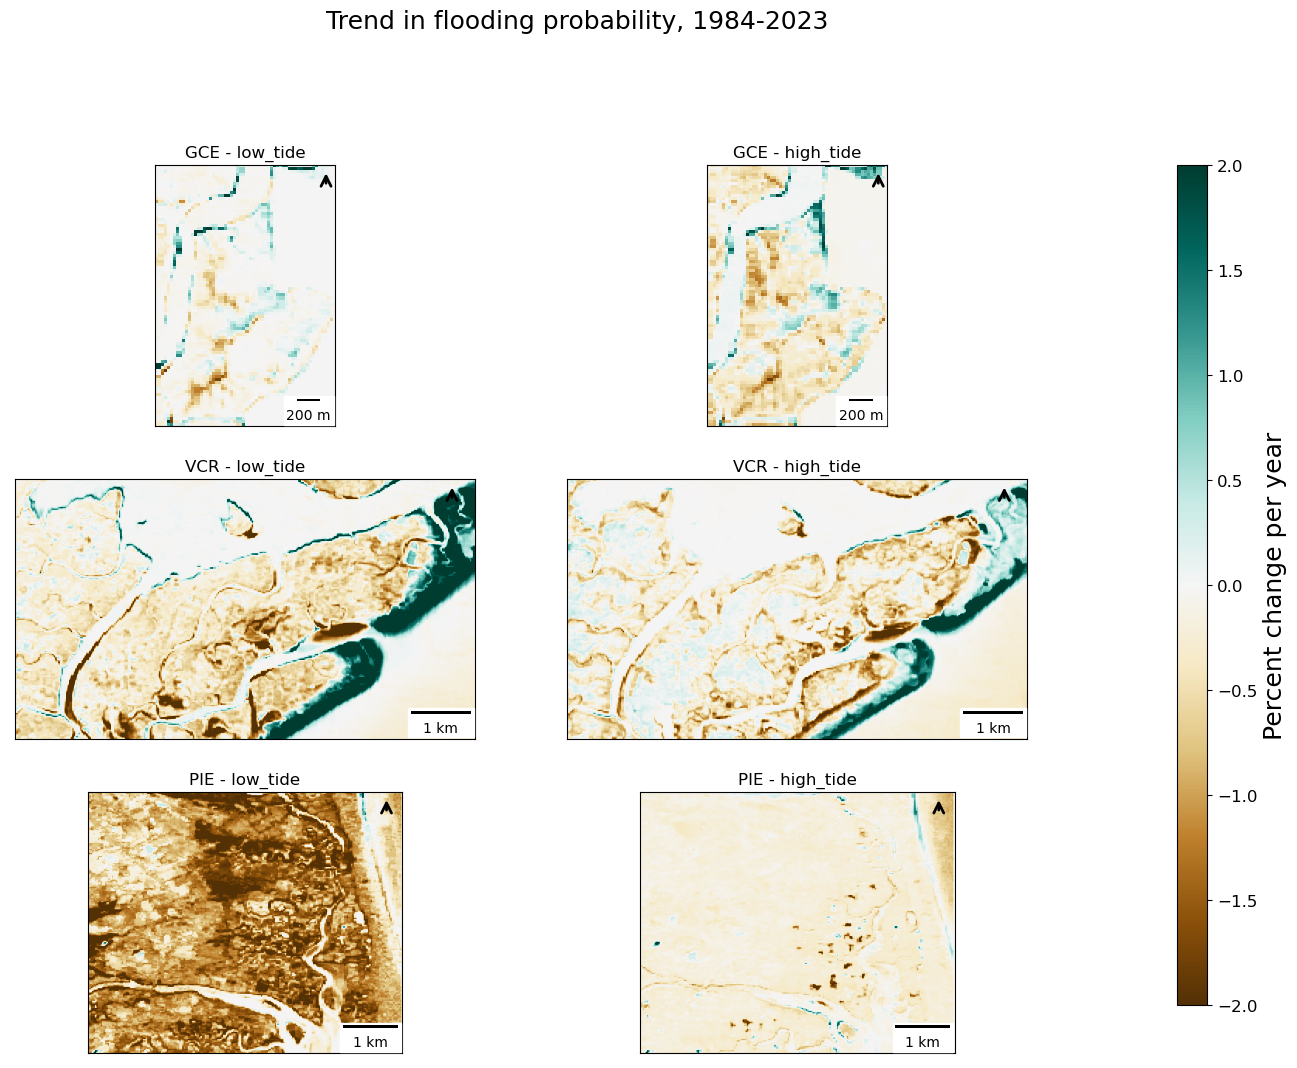

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import geopandas as gpd
from geopy.distance import great_circle
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.colors as colors

# Define filepaths and titles in dictionaries (replace with your actual data)
data_sets = {
    "GCE": {
        "low_tide": "F:/Flats imagery/Tide stage composites/low_slope.scale.tif",
#         "mid_tide": "F:/Flats imagery/Tide stage composites/mid_slope.scale.tif",
        "high_tide": "F:/Flats imagery/Tide stage composites/high_slope.scale.tif"
    },
    "VCR": {
        "low_tide": "F:/Flats imagery/Tidecomps_VA/low_slope.scale.tif",
#         "mid_tide": "F:/Flats imagery/Tidecomps_VA/mid_slope.scale.tif",
        "high_tide": "F:/Flats imagery/Tidecomps_VA/high_slope.scale.tif"
    },
    "PIE": {
        "low_tide": "F:/Flats imagery/Tidecomps_MA/low_slope.scale.tif",
#         "mid_tide": "F:/Flats imagery/Tidecomps_MA/mid_slope.scale.tif",
        "high_tide": "F:/Flats imagery/Tidecomps_MA/high_slope.scale.tif"
    }
}

# Calculate dx for scale_bar
point1 = (31.425, -81.29)
point2 = (31.425, -80.29)
dx = great_circle(point1, point2).meters

def plot_geotiff_with_scale_and_north_arrow(geotiff_path, ax, title, data_min, data_max):
    with rasterio.open(geotiff_path) as src:
        data = src.read(1)
        extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
        
        gamma = 1
        data = data ** gamma 

#         Normalize the data based on the overall min and max values
        data_normalized = (data) / (1)*100
        
        cmap = 'BrBG'
        im = ax.imshow(data_normalized, extent=extent, cmap=cmap, vmin=-2, vmax=2)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        scale_bar = ScaleBar(dx=dx, location='lower right')
        ax.add_artist(scale_bar)
        
        ax.annotate('', xy=(0.95, 0.98), xycoords='axes fraction', fontsize=18, ha='center', va='center',
                    xytext=(0.95, 0.92), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle='->', lw=2, color='black'))
        
        ax.set_title(title)
        
        return im

# Main execution loop
fig, axes = plt.subplots(len(data_sets), 2, figsize=(15, len(data_sets)*4))  # Adjusted based on number of plots

# Initialize variables outside the loop
ims = []
data_min = float('inf')
data_max = float('-inf')

plot_index = 0  # Counter for plot positions
for plot_name, data_paths in data_sets.items():
    for i, (tide_stage, filepath) in enumerate(data_paths.items()):
        ax = axes[plot_index, i]  # Use plot_index to access the correct subplot
        with rasterio.open(filepath) as src:
            data = src.read(1)
            data_min = min(data_min, np.min(data))
            data_max = max(data_max, np.max(data))
            im = plot_geotiff_with_scale_and_north_arrow(filepath, ax, f"{plot_name} - {tide_stage}", data_min, data_max)
            ims.append(im)
    plot_index += 1  # Increment plot_index for the next plot

# Add suptitle and colorbar after the loop
plt.suptitle('Trend in flooding probability, 1984-2023', fontsize=18)

fig.subplots_adjust(right=0.8)
fig.subplots_adjust(top=0.85)

cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
cbar = plt.colorbar(ims[-1], cax=cbar_ax, label='Percent change per year')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"Percent change per year", size=18)

# Savefig
import os
os.chdir("C:/Users/arj26323/Downloads")
# plt.savefig('all_trends.png',bbox_inches='tight', dpi = 300)

plt.show()

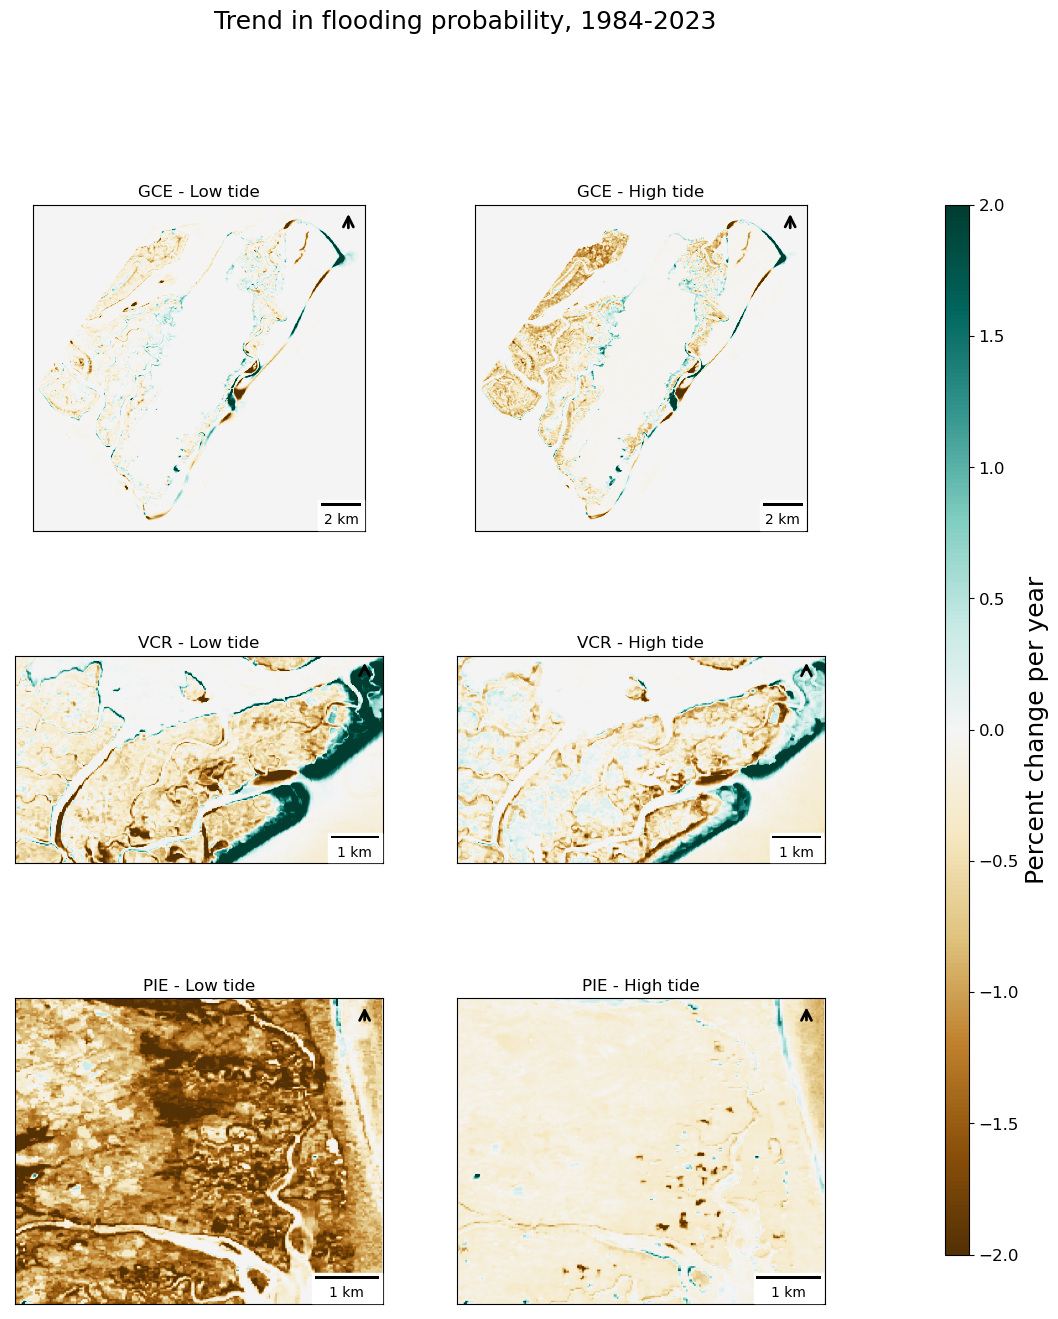

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import geopandas as gpd
from geopy.distance import great_circle
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.colors as colors

# Define filepaths and titles in dictionaries (replace with your actual data)
data_sets = {
    "GCE": {
        "Low tide": "F:/Flats imagery/Tide stage composites/GCE/low_slope.scale.tif",
#         "mid_tide": "F:/Flats imagery/Tide stage composites/GCE/mid_slope.scale.tif",
        "High tide": "F:/Flats imagery/Tide stage composites/GCE/high_slope.scale.tif"
    },
    "VCR": {
        "Low tide": "F:/Flats imagery/Tidecomps_VA/low_slope.scale.tif",
#         "mid_tide": "F:/Flats imagery/Tidecomps_VA/mid_slope.scale.tif",
        "High tide": "F:/Flats imagery/Tidecomps_VA/high_slope.scale.tif"
    },
    "PIE": {
        "Low tide": "F:/Flats imagery/Tidecomps_MA/low_slope.scale.tif",
#         "mid_tide": "F:/Flats imagery/Tidecomps_MA/mid_slope.scale.tif",
        "High tide": "F:/Flats imagery/Tidecomps_MA/high_slope.scale.tif"
    }
}

# Calculate dx for scale_bar
point1 = (31.425, -81.29)
point2 = (31.425, -80.29)
dx = great_circle(point1, point2).meters

def plot_geotiff_with_scale_and_north_arrow(geotiff_path, ax, title, data_min, data_max):
    with rasterio.open(geotiff_path) as src:
        data = src.read(1)
        extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
        
        gamma = 1
        data = data ** gamma 

#         Normalize the data based on the overall min and max values
        data_normalized = (data) / (1)*100
        
        cmap = 'BrBG'
        im = ax.imshow(data_normalized, extent=extent, cmap=cmap, vmin=-2, vmax=2)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        scale_bar = ScaleBar(dx=dx, location='lower right')
        ax.add_artist(scale_bar)
        
        ax.annotate('', xy=(0.95, 0.98), xycoords='axes fraction', fontsize=18, ha='center', va='center',
                    xytext=(0.95, 0.92), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle='->', lw=2, color='black'))
        
        ax.set_title(title)
        
        return im

# Main execution loop
fig, axes = plt.subplots(len(data_sets), 2, figsize=(12, len(data_sets)*5))  # Adjusted based on number of plots

# Initialize variables outside the loop
ims = []
data_min = float('inf')
data_max = float('-inf')

plot_index = 0  # Counter for plot positions
for plot_name, data_paths in data_sets.items():
    for i, (tide_stage, filepath) in enumerate(data_paths.items()):
        ax = axes[plot_index, i]  # Use plot_index to access the correct subplot
        with rasterio.open(filepath) as src:
            data = src.read(1)
            data_min = min(data_min, np.min(data))
            data_max = max(data_max, np.max(data))
            im = plot_geotiff_with_scale_and_north_arrow(filepath, ax, f"{plot_name} - {tide_stage}", data_min, data_max)
            ims.append(im)
    plot_index += 1  # Increment plot_index for the next plot

# Add suptitle and colorbar after the loop
plt.suptitle('Trend in flooding probability, 1984-2023', fontsize=18)

fig.subplots_adjust(right=0.8)
fig.subplots_adjust(top=0.85)

cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
cbar = plt.colorbar(ims[-1], cax=cbar_ax, label='Percent change per year')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(r"Percent change per year", size=18)

# Savefig
import os
os.chdir("C:/Users/arj26323/Downloads")
# plt.savefig('all_trends2.png',bbox_inches='tight', dpi = 300)

plt.show()